# Raspberry Pi 5

## 1. Copy files to correct location

In [1]:
#!pip install keras==3.3.3 --break-system-packages
#!pip list
! cd ~
!sudo cp /tmp/imageclassifier.keras ~/gitlab/PhD_Lab/ImageClassification/imageclassifier.keras
!sudo chown ph1lb0t ~/gitlab/PhD_Lab/imageclassifier.keras

## 2. Import modules

In [2]:
from tensorflow.keras.models import load_model
import tensorflow as tf
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
#gpus = tf.config.experimental.list_physical_devices('GPU')
#for gpu in gpus: 
#    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
data_dir = 'data_malware' 
img_height = 256
img_width = 256

In [5]:
data = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    pad_to_aspect_ratio=False,
    image_size=(img_height, img_width)
)


Found 9339 files belonging to 25 classes.


In [6]:
class_names = data.class_names
print(class_names)

['Adialer.C', 'Agent.FYI', 'Allaple.A', 'Allaple.L', 'Alueron.gen!J', 'Autorun.K', 'C2LOP.P', 'C2LOP.gen!g', 'Dialplatform.B', 'Dontovo.A', 'Fakerean', 'Instantaccess', 'Lolyda.AA1', 'Lolyda.AA2', 'Lolyda.AA3', 'Lolyda.AT', 'Malex.gen!J', 'Obfuscator.AD', 'Rbot!gen', 'Skintrim.N', 'Swizzor.gen!E', 'Swizzor.gen!I', 'VB.AT', 'Wintrim.BX', 'Yuner.A']


## 3. Load model

In [7]:
%%time
#new_model = load_model(os.path.join('imageclassifier.keras'), custom_objects={'class_names': class_names})
new_model = load_model(os.path.join('imageclassifier.keras'))
new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │         6,425 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,108,381 (42.38 MB)

 Trainable params: 3,702,793 (14.13 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,405,588 (28.25 MB)

CPU times: user 695 ms, sys: 611 ms, total: 1.31 s
Wall time: 1.2 s


## 4. Test the model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
This image most likely belongs to Yuner.A with a 81.54 percent confidence.
CPU times: user 185 ms, sys: 11.2 ms, total: 196 ms
Wall time: 160 ms


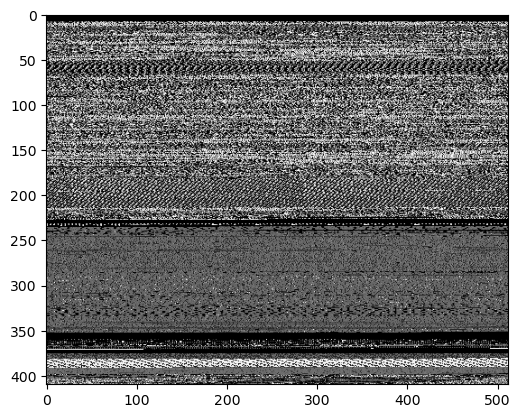

In [8]:
%%time
img = cv2.imread('Adailer.C.png')
resize = tf.image.resize(img, (256,256))
plt.imshow(img)
plt.show
yhat = new_model.predict(np.expand_dims(resize/255, 0))
yhat
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(yhat)], 100 * np.max(yhat))
)

In [9]:
import datetime
now = datetime.datetime.now()
print("Current date and time : ")
print(now.strftime("%Y-%m-%d %H:%M:%S"))

Current date and time : 
2024-08-19 21:09:25
